In [28]:
import pandas as pd
%matplotlib inline

In [5]:
import os

In [6]:
os.listdir()

['.ipynb_checkpoints',
 'StroopWithPandas',
 '08_pandas.md',
 'Galton Analysis.ipynb',
 'GaltonData']

In [3]:
os.getcwd()

'/home/nickdg/Dropbox/Teaching/PythonCourse2/MartinRepo/08_pandas'

# Galton Exercise

This dataset is taken from Francis Galton's 1885 study and explores the relationship between the heights of adult children and the heights of their parents. I found it at http://www.math.uah.edu/stat/data/Galton.html

**Every row of the csv file Galton.csv represents a single child**, and each column describes their parents and family. 

Let's use Pandas to analyze this dataset!

## Load The Data

Most data file types can be read into Pandas using a pandas.read_xxx() function.

In [7]:
ls

08_pandas.md  Galton Analysis.ipynb  GaltonData/  StroopWithPandas/


In [15]:
data_dir = 'GaltonData/Galton.csv'
df = pd.read_csv(data_dir)
df.head(5)

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


## Describe the Data

How many children are in this dataset?

In [16]:
len(df)

898

What variables (columns) are there in this dataset?

In [21]:
df.columns

Index(['Family', 'Father', 'Mother', 'Gender', 'Height', 'Kids'], dtype='object')

What is the mean child height?

In [23]:
df['Height'].mean()

66.760690423162586

In [25]:
import numpy as np
np.mean(df['Height'])

66.760690423162586

In [27]:
df.Height.mean()

66.760690423162586

What does the distribution of child heights look like? (Plot a histogram)

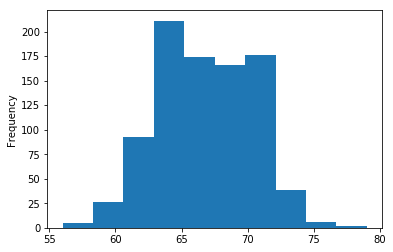

In [31]:
df.Height.plot.hist()

## Analyzing Family Data

How many families are there in this data?

In [35]:
len(pd.unique(df.Family))

197

In [37]:
len(df.groupby('Family'))

197

In [44]:
del df['Kids']
df.head()

,Family,Father,Mother,Gender,Height
0,1,78.5,67.0,M,73.2
1,1,78.5,67.0,F,69.2
2,1,78.5,67.0,F,69.0
3,1,78.5,67.0,F,69.0
4,2,75.5,66.5,M,73.5


What is the mean Father height?  The mean Mother height?  (Note: because parents are repeated in this data, it makes sense to first **group** the data by family, otherwise parents with more children will be weighed more heavily than parents with fewer children.)

In [69]:
family_df = df.groupby('Family').mean()
del family_df['Height']
family_df.head()
family_df.head()

,Father,Mother
Family,,
1,78.5,67.0
10,74.0,65.5
100,69.0,66.0
101,69.0,66.7
102,69.0,66.0


In [70]:
children_df = df[['Family', 'Height']]
children_df = children_df.set_index('Family')
children_df.head()

,Height
Family,
1,73.2
1,69.2
1,69.0
1,69.0
2,73.5


In [77]:
df.join?

In [50]:
family_df['Father'].mean()

69.3492385786802

In [48]:
family_df['Mother'].mean()

63.984263959390873

Is there a relationship between Father and Mother height?  Plot them against each other in a scatter plot, and check for a correlation.

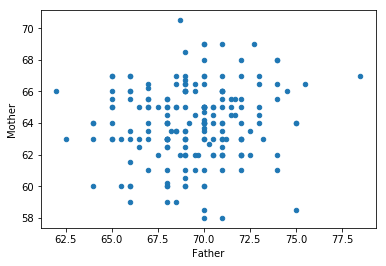

In [51]:
family_df.plot.scatter(x='Father', y='Mother')

In [52]:
family_df.corr()

,Father,Mother,Height
Father,1.000000,0.100606,0.33451
Mother,0.100606,1.000000,0.26130
Height,0.334510,0.261300,1.00000


Is there a relationship between parent height (Father or Mother) and the average height of their children?

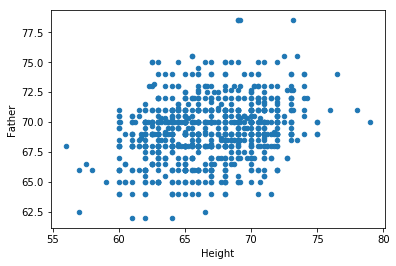

In [54]:
df.plot.scatter('Height', 'Father')

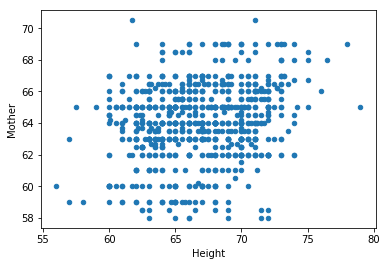

In [55]:
df.plot.scatter('Height', 'Mother')